In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import os


/tmp/ipykernel_32773/3559419648.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:

# Veri setini yükleme
print("Veri seti yükleniyor...")
df = pd.read_csv('data/medical-charges.csv')

Veri seti yükleniyor...


In [4]:

# Veri seti hakkında genel bilgi
print("\nVeri seti boyutu:", df.shape)
print("\nVeri seti bilgileri:")
print(df.info())
print("\nİstatistiksel özet:")
print(df.describe())



Veri seti boyutu: (1338, 7)

Veri seti bilgileri:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None

İstatistiksel özet:
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   93

In [5]:

# İlk 5 satırı göster
print("\nİlk 5 satır:")
print(df.head())



İlk 5 satır:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [6]:

# Eksik değerleri kontrol et
print("\nEksik değerler:")
print(df.isnull().sum())



Eksik değerler:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [7]:
# Kategorik değişkenleri işleme
print("\nKategorik değişkenleri dönüştürme:")
# Veri setinin bir kopyasını oluştur
df_encoded = df.copy()

# Cinsiyet değişkenini dönüştürme ('female': 0, 'male': 1)
df_encoded['sex'] = df['sex'].map({'female': 0, 'male': 1})

# Sigara içme durumunu dönüştürme ('no': 0, 'yes': 1)
df_encoded['smoker'] = df['smoker'].map({'no': 0, 'yes': 1})

# Bölge değişkenini one-hot encoding ile dönüştürme
df_encoded = pd.get_dummies(df_encoded, columns=['region'], drop_first=True)

print(df_encoded.head())


Kategorik değişkenleri dönüştürme:
   age  sex     bmi  children  smoker      charges  region_northwest  \
0   19    0  27.900         0       1  16884.92400             False   
1   18    1  33.770         1       0   1725.55230             False   
2   28    1  33.000         3       0   4449.46200             False   
3   33    1  22.705         0       0  21984.47061              True   
4   32    1  28.880         0       0   3866.85520              True   

   region_southeast  region_southwest  
0             False              True  
1              True             False  
2              True             False  
3             False             False  
4             False             False  



Korelasyon analizi:
charges             1.000000
smoker              0.787251
age                 0.299008
bmi                 0.198341
region_southeast    0.073982
children            0.067998
sex                 0.057292
region_northwest   -0.039905
region_southwest   -0.043210
Name: charges, dtype: float64


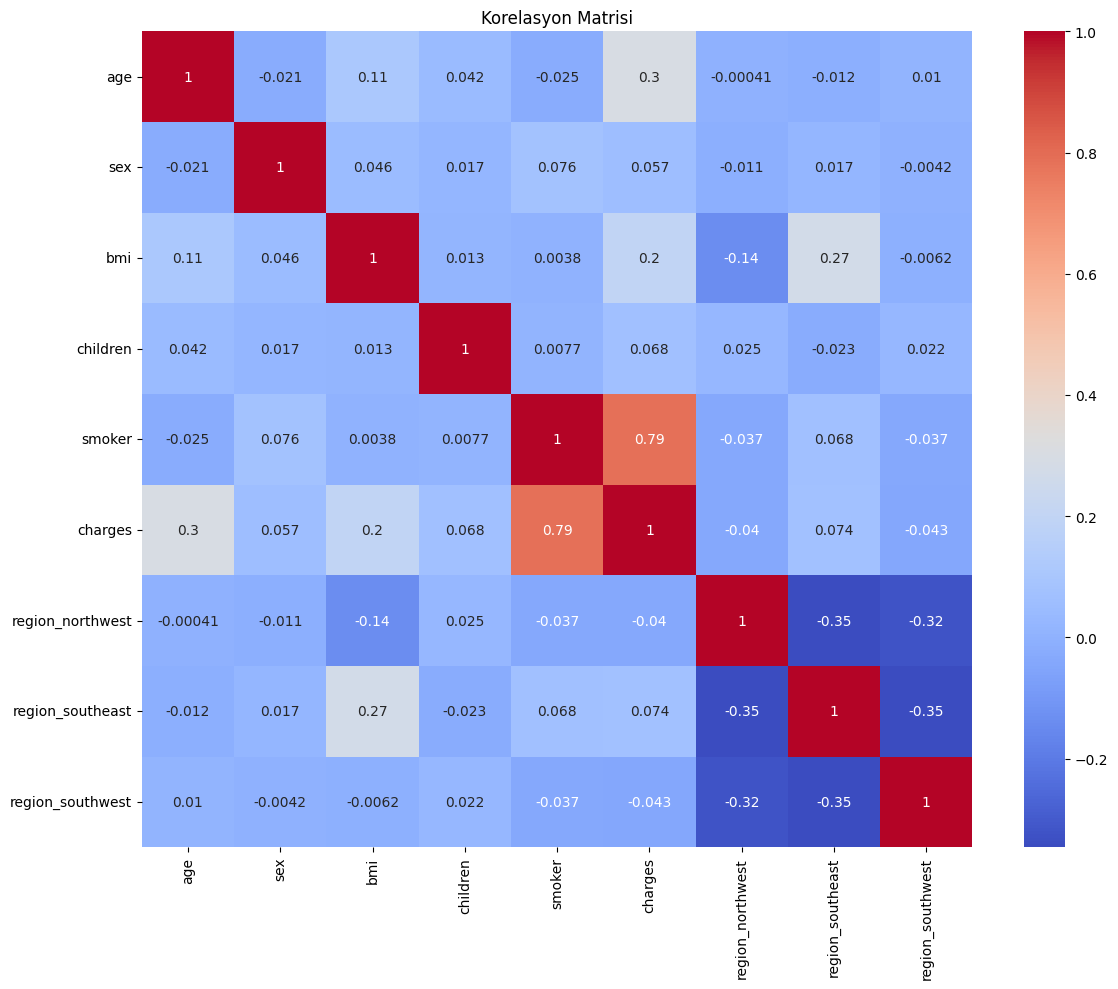

In [8]:
# Korelasyon analizi
print("\nKorelasyon analizi:")
correlation = df_encoded.corr()
print(correlation['charges'].sort_values(ascending=False))

# Korelasyon matrisi görselleştirme
plt.figure(figsize=(12, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Korelasyon Matrisi')
plt.tight_layout()
plt.show()

In [9]:
# Özellikler ve hedef değişkeni ayırma
X = df_encoded.drop('charges', axis=1)
y = df_encoded['charges']

# Eğitim ve test setlerine bölme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Eğitim seti boyutu: {X_train.shape}")
print(f"Test seti boyutu: {X_test.shape}")

# İki farklı model eğitelim
# 1. Lineer Regresyon
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# 2. Random Forest Regresyon
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

Eğitim seti boyutu: (1070, 8)
Test seti boyutu: (268, 8)


RandomForestRegressor(random_state=42)


--- Lineer Regresyon Performansı ---
RMSE: 5796.28
R² Skoru: 0.78

--- Random Forest Performansı ---
RMSE: 4577.74
R² Skoru: 0.87


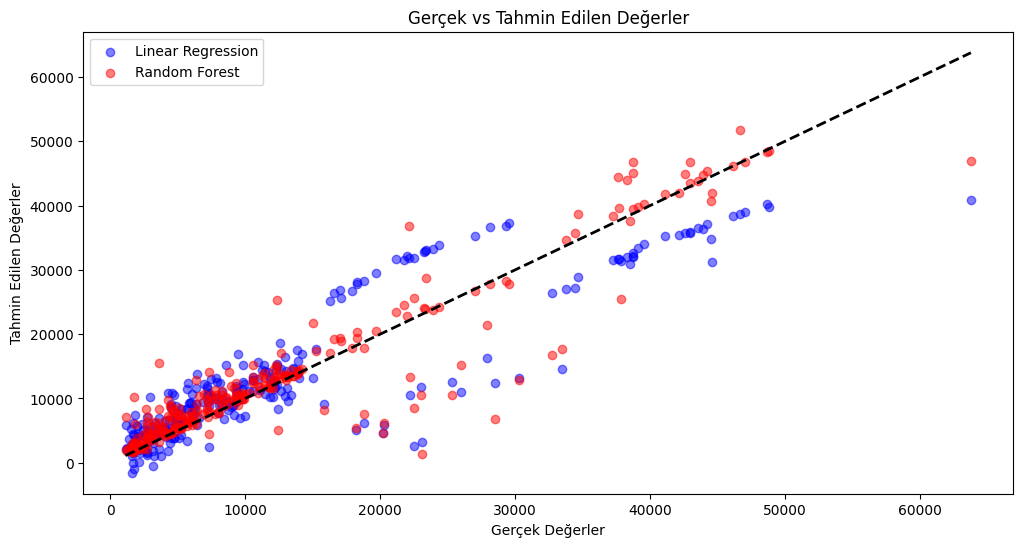

In [10]:
# Tahminler
lr_predictions = lr_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)

# Değerlendirme metrikleri
print("\n--- Lineer Regresyon Performansı ---")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, lr_predictions)):.2f}")#Modelin tahminlerinin gerçek değerlerden ne kadar saptığını gösterir. ne kadar düşükse model o kadar iyi demektir.
print(f"R² Skoru: {r2_score(y_test, lr_predictions):.2f}") #Modelin ne kadar iyi tahmin yaptığını gösterir. 1'e yakınsa model iyi demektir.

print("\n--- Random Forest Performansı ---")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, rf_predictions)):.2f}")
print(f"R² Skoru: {r2_score(y_test, rf_predictions):.2f}")

# Tahmin vs Gerçek Değer Grafiği
plt.figure(figsize=(12, 6))
plt.scatter(y_test, lr_predictions, alpha=0.5, color='blue', label='Linear Regression')
plt.scatter(y_test, rf_predictions, alpha=0.5, color='red', label='Random Forest')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')
plt.title('Gerçek vs Tahmin Edilen Değerler')
plt.legend()
plt.show()


Özellik Önemliliği:
            feature  importance
4            smoker    0.608618
2               bmi    0.216500
0               age    0.134203
3          children    0.019463
1               sex    0.006373
5  region_northwest    0.005621
6  region_southeast    0.005284
7  region_southwest    0.003938


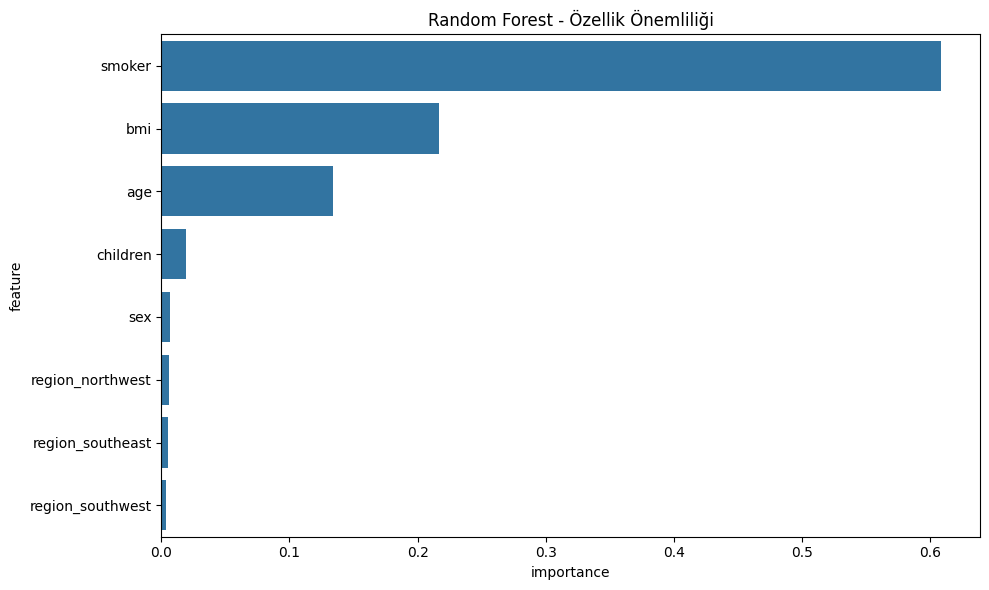

In [11]:
# Özellik önemliliği
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nÖzellik Önemliliği:")
print(feature_importance)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Random Forest - Özellik Önemliliği')
plt.tight_layout()
plt.show()

In [12]:
# Örnek tahmin için birkaç örnek oluşturalım
sample_data = [
    {"age": 25, "sex": "male", "bmi": 22.5, "children": 0, "smoker": "no", "region": "southwest"},
    {"age": 40, "sex": "female", "bmi": 30.2, "children": 2, "smoker": "yes", "region": "southeast"},
    {"age": 60, "sex": "male", "bmi": 28.6, "children": 1, "smoker": "no", "region": "northwest"}
]

# Örnekleri dönüştürme ve tahmin etme fonksiyonu
def predict_charges(sample, model):
    # Cinsiyet ve sigara içme durumunu dönüştürme
    sample_encoded = sample.copy()
    sample_encoded['sex'] = 1 if sample['sex'] == 'male' else 0
    sample_encoded['smoker'] = 1 if sample['smoker'] == 'yes' else 0
    
    # Bölge için one-hot encoding
    region_cols = ['region_northwest', 'region_southeast', 'region_southwest']
    for col in region_cols:
        region = col.split('_')[1]
        sample_encoded[col] = 1 if sample['region'] == region else 0
    
    # 'region' sütununu kaldır
    del sample_encoded['region']
    
    # Dataframe'e dönüştür
    df_sample = pd.DataFrame([sample_encoded])
    
    # Tahmin
    prediction = model.predict(df_sample)[0]
    return prediction

print("\nÖrnek Tahminler:")
for i, sample in enumerate(sample_data):
    lr_pred = predict_charges(sample, lr_model)
    rf_pred = predict_charges(sample, rf_model)
    
    print(f"\nÖrnek {i+1}:")
    print(f"Yaş: {sample['age']}, Cinsiyet: {sample['sex']}, BMI: {sample['bmi']}, " + 
          f"Çocuk Sayısı: {sample['children']}, Sigara: {sample['smoker']}, Bölge: {sample['region']}")
    print(f"Lineer Regresyon Tahmin: ${lr_pred:.2f}")
    print(f"Random Forest Tahmin: ${rf_pred:.2f}")


Örnek Tahminler:

Örnek 1:
Yaş: 25, Cinsiyet: male, BMI: 22.5, Çocuk Sayısı: 0, Sigara: no, Bölge: southwest
Lineer Regresyon Tahmin: $1249.36
Random Forest Tahmin: $3896.98

Örnek 2:
Yaş: 40, Cinsiyet: female, BMI: 30.2, Çocuk Sayısı: 2, Sigara: yes, Bölge: southeast
Lineer Regresyon Tahmin: $32371.83
Random Forest Tahmin: $43802.59

Örnek 3:
Yaş: 60, Cinsiyet: male, BMI: 28.6, Çocuk Sayısı: 1, Sigara: no, Bölge: northwest
Lineer Regresyon Tahmin: $13164.18
Random Forest Tahmin: $13501.27



Test seti boyutu: (50, 7)
Test seti ilk 5 örnek:
      age     sex     bmi  children smoker     region      charges
709    36  female  27.740         0     no  northeast   5469.00660
921    62  female  33.200         0     no  southwest  13462.52000
554    25  female  41.325         0     no  northeast  17878.90068
1201   46    male  40.375         2     no  northwest   8733.22925
563    50    male  44.770         1     no  southeast   9058.73030

--- Test Seti Üzerinde Model Performansı ---

Lineer Regresyon Test Performansı:
RMSE: $5601.08
MAE: $3873.65
R² Skoru: 0.5393

Random Forest Test Performansı:
RMSE: $1985.53
MAE: $1249.46
R² Skoru: 0.9421


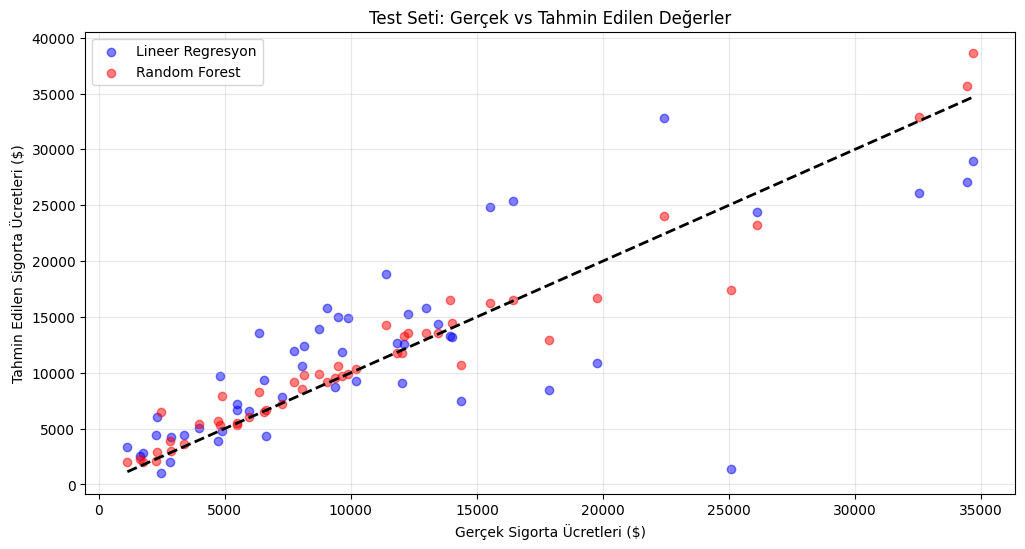

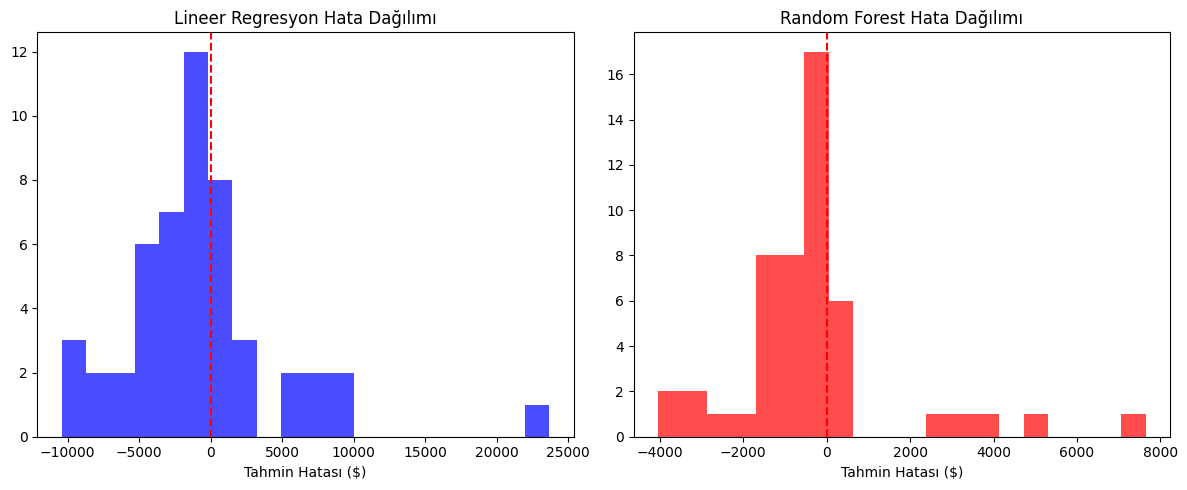


En Büyük 5 Lineer Regresyon Hatası:
      Gerçek Değer        Tahmin          Hata
219    25081.76784   1402.251724  23679.516116
98     22412.64850  32816.954052 -10404.305552
554    17878.90068   8423.523305   9455.377375
157    15518.18025  24813.185814  -9295.005564
1026   16450.89470  25412.977109  -8962.082409

En Büyük 5 Random Forest Hatası:
      Gerçek Değer        Tahmin         Hata
219    25081.76784  17435.437818  7646.330022
554    17878.90068  12964.566871  4914.333809
714     2457.50200   6500.620080 -4043.118080
1078   34672.14720  38648.339482 -3976.192282
1128   14358.36437  10682.575819  3675.788551


In [13]:
# Veri setinden rastgele bir test seti oluşturma
test_size = 50  # Test seti boyutu
test_indices = np.random.choice(df.index, size=test_size, replace=False)
df_test = df.loc[test_indices].copy()

print(f"\nTest seti boyutu: {df_test.shape}")
print(f"Test seti ilk 5 örnek:")
print(df_test.head())

# Test seti için tahminleri hazırlama
def prepare_and_predict(test_df, model):
    # Test setini modele uygun formata dönüştürme
    test_encoded = test_df.copy()
    
    # Kategorik değişkenleri dönüştürme
    test_encoded['sex'] = test_df['sex'].map({'female': 0, 'male': 1})
    test_encoded['smoker'] = test_df['smoker'].map({'no': 0, 'yes': 1})
    
    # Bölge için one-hot encoding
    test_encoded = pd.get_dummies(test_encoded, columns=['region'], drop_first=True)
    
    # Region_northeast sütunu drop_first=True nedeniyle yok, eğer eksikse 0 olarak ekleyelim
    for col in ['region_northwest', 'region_southeast', 'region_southwest']:
        if col not in test_encoded.columns:
            test_encoded[col] = 0
            
    # Gerçek değerleri kaydet
    y_actual = test_encoded['charges']
    
    # Özellikleri ayır
    X_test = test_encoded.drop('charges', axis=1)
    
    # Tahmin yap
    predictions = model.predict(X_test)
    
    return y_actual, predictions

# Her iki model için tahminleri yap ve değerlendir
print("\n--- Test Seti Üzerinde Model Performansı ---")

# Lineer Regresyon değerlendirmesi
lr_actual, lr_preds = prepare_and_predict(df_test, lr_model)
lr_rmse = np.sqrt(mean_squared_error(lr_actual, lr_preds))
lr_r2 = r2_score(lr_actual, lr_preds)
lr_mae = np.mean(np.abs(lr_actual - lr_preds))

print("\nLineer Regresyon Test Performansı:")
print(f"RMSE: ${lr_rmse:.2f}")
print(f"MAE: ${lr_mae:.2f}")
print(f"R² Skoru: {lr_r2:.4f}")

# Random Forest değerlendirmesi
rf_actual, rf_preds = prepare_and_predict(df_test, rf_model)
rf_rmse = np.sqrt(mean_squared_error(rf_actual, rf_preds))
rf_r2 = r2_score(rf_actual, rf_preds)
rf_mae = np.mean(np.abs(rf_actual - rf_preds))

print("\nRandom Forest Test Performansı:")
print(f"RMSE: ${rf_rmse:.2f}")
print(f"MAE: ${rf_mae:.2f}")
print(f"R² Skoru: {rf_r2:.4f}")

# Gerçek değerler vs Tahminler görselleştirme
plt.figure(figsize=(12, 6))
plt.scatter(lr_actual, lr_preds, alpha=0.5, color='blue', label='Lineer Regresyon')
plt.scatter(rf_actual, rf_preds, alpha=0.5, color='red', label='Random Forest')
plt.plot([min(lr_actual), max(lr_actual)], [min(lr_actual), max(lr_actual)], 'k--', lw=2)
plt.xlabel('Gerçek Sigorta Ücretleri ($)')
plt.ylabel('Tahmin Edilen Sigorta Ücretleri ($)')
plt.title('Test Seti: Gerçek vs Tahmin Edilen Değerler')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Hata dağılımları görselleştirme
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(lr_actual - lr_preds, bins=20, alpha=0.7, color='blue')
plt.axvline(0, color='red', linestyle='--')
plt.title('Lineer Regresyon Hata Dağılımı')
plt.xlabel('Tahmin Hatası ($)')

plt.subplot(1, 2, 2)
plt.hist(rf_actual - rf_preds, bins=20, alpha=0.7, color='red')
plt.axvline(0, color='red', linestyle='--')
plt.title('Random Forest Hata Dağılımı')
plt.xlabel('Tahmin Hatası ($)')

plt.tight_layout()
plt.show()

# En büyük hataları inceleme
lr_errors = pd.DataFrame({
    'Gerçek Değer': lr_actual, 
    'Tahmin': lr_preds, 
    'Hata': lr_actual - lr_preds
})

rf_errors = pd.DataFrame({
    'Gerçek Değer': rf_actual, 
    'Tahmin': rf_preds, 
    'Hata': rf_actual - rf_preds
})

print("\nEn Büyük 5 Lineer Regresyon Hatası:")
print(lr_errors.sort_values('Hata', key=abs, ascending=False).head(5))

print("\nEn Büyük 5 Random Forest Hatası:")
print(rf_errors.sort_values('Hata', key=abs, ascending=False).head(5))

In [14]:
import joblib
import os

# Modelleri kaydetmek için klasör oluşturma
os.makedirs('models', exist_ok=True)

# Modelleri kaydet
joblib.dump(lr_model, 'models/linear_regression_model.pkl')
joblib.dump(rf_model, 'models/random_forest_model.pkl')

print("Modeller başarıyla 'models' klasörüne kaydedildi.")

# Örnek bir model yükleme kodu (başka projede kullanmak için)
# loaded_lr_model = joblib.load('models/linear_regression_model.pkl')
# loaded_rf_model = joblib.load('models/random_forest_model.pkl')

Modeller başarıyla 'models' klasörüne kaydedildi.


Yaş değişkeni istatistikleri:
count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64


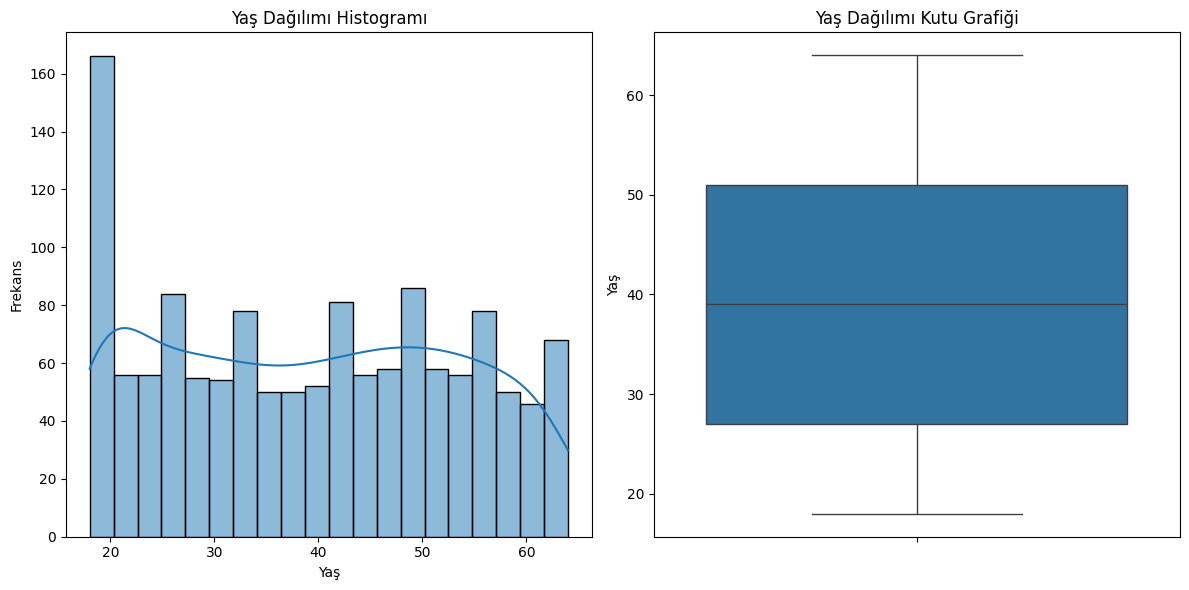

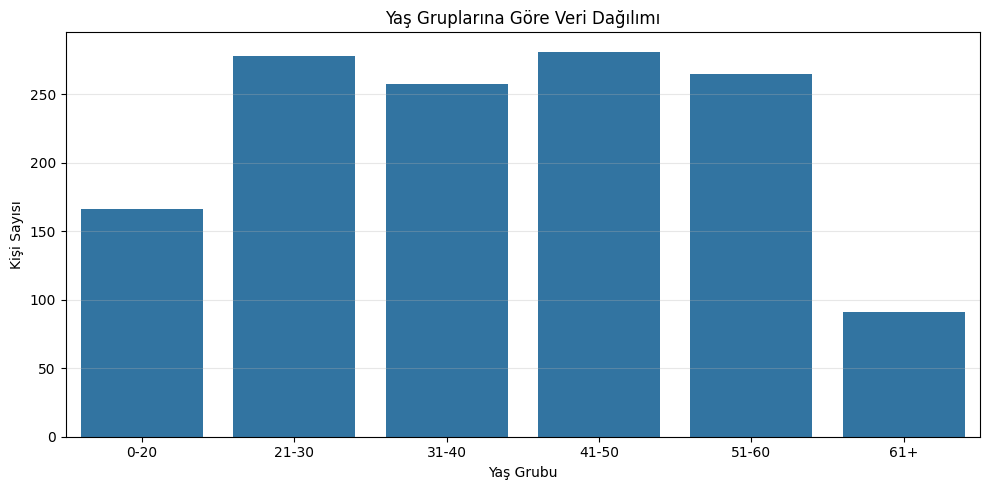

/tmp/ipykernel_32773/3840067778.py:39: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_charges = df.groupby('age_group')['charges'].mean().reset_index()


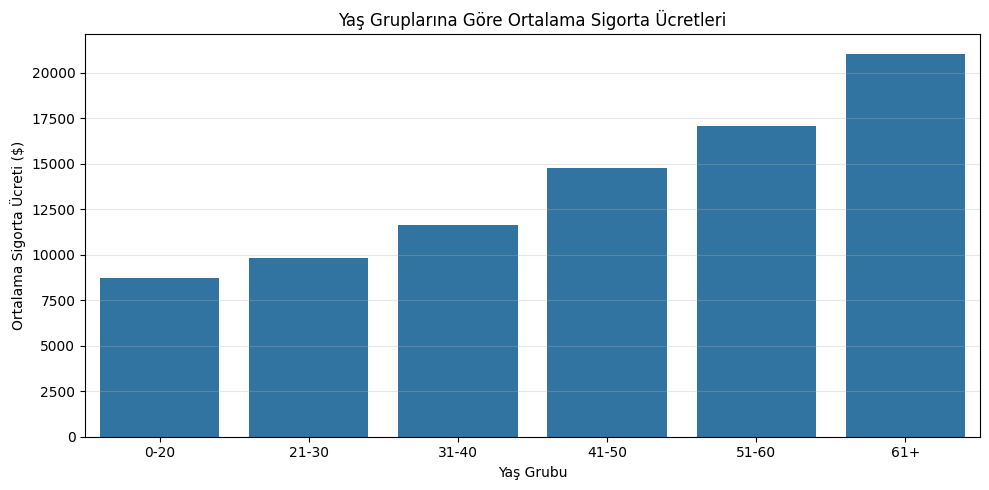

In [15]:
# Yaş dağılımı analizi ve görselleştirme
print("Yaş değişkeni istatistikleri:")
print(df['age'].describe())

# Histogram ve yoğunluk grafiği
plt.figure(figsize=(12, 6))

# Sol tarafta histogram
plt.subplot(1, 2, 1)
sns.histplot(df['age'], kde=True, bins=20)
plt.title('Yaş Dağılımı Histogramı')
plt.xlabel('Yaş')
plt.ylabel('Frekans')

# Sağ tarafta kutu grafiği (box plot)
plt.subplot(1, 2, 2)
sns.boxplot(y=df['age'])
plt.title('Yaş Dağılımı Kutu Grafiği')
plt.ylabel('Yaş')

plt.tight_layout()
plt.show()

# Yaş gruplarına göre analiz
df['age_group'] = pd.cut(df['age'], bins=[0, 20, 30, 40, 50, 60, 100], labels=['0-20', '21-30', '31-40', '41-50', '51-60', '61+'])

# Yaş gruplarının dağılımı
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='age_group')
plt.title('Yaş Gruplarına Göre Veri Dağılımı')
plt.xlabel('Yaş Grubu')
plt.ylabel('Kişi Sayısı')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Her yaş grubunun ortalama sigorta ücreti
age_charges = df.groupby('age_group')['charges'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(data=age_charges, x='age_group', y='charges')
plt.title('Yaş Gruplarına Göre Ortalama Sigorta Ücretleri')
plt.xlabel('Yaş Grubu')
plt.ylabel('Ortalama Sigorta Ücreti ($)')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()